In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv(r'C:\Users\Sahan\Documents\Project_3\CSV\final_df.csv')
df

,price,Borough,property_type,Average Income,street_name,Average Rent,bedroom_number
0,"$1,195,000",Bronx,SINGLE_FAMILY,"$47,036",Penfield Street,"$1,401",NaN
1,"$889,000",Bronx,MULTI_FAMILY,"$47,036",E 235th Street,"$1,401",6.0
2,"$699,000",Bronx,SINGLE_FAMILY,"$47,036",E 239th Street,"$1,401",4.0
3,"$179,000",Bronx,CONDO,"$47,036",Webster Ave APT 2E,"$1,401",1.0
4,"$599,000",Bronx,SINGLE_FAMILY,"$47,036",E 237th Street,"$1,401",3.0
...,...,...,...,...,...,...,...
34377,"$800,000",Manhattan,CONDO,"$99,880",W 122nd St #8I,"$2,024",1.0
34378,"$330,000",Manhattan,CONDO,"$99,880",W 138th St #5I,"$2,024",1.0
34379,"$418,800",Manhattan,CONDO,"$99,880",Park Ter E #6,"$2,024",1.0
34380,"$410,000",Manhattan,CONDO,"$99,880",Park Ter E APT D76,"$2,024",1.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34382 entries, 0 to 34381
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           34382 non-null  object 
 1   Borough         34382 non-null  object 
 2   property_type   34382 non-null  object 
 3   Average Income  34382 non-null  object 
 4   street_name     34381 non-null  object 
 5   Average Rent    34382 non-null  object 
 6   bedroom_number  33462 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.8+ MB


In [31]:
df['price'] = df['price'].astype(str)

# Step 2: Clean the 'price' column and convert to numeric
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True)  # Remove dollar signs and commas
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert to numeric, coercing errors to NaN

# Step 3: Calculate the 'Mortgage' column using the decimal rate
df['Mortgage'] = df['price'] * 0.0673

# Step 4: Check the DataFrame
print(df.head())

     price Borough  property_type Average Income         street_name  \
0  1195000   Bronx  SINGLE_FAMILY       $47,036      Penfield Street   
1   889000   Bronx   MULTI_FAMILY       $47,036       E 235th Street   
2   699000   Bronx  SINGLE_FAMILY       $47,036       E 239th Street   
3   179000   Bronx          CONDO       $47,036   Webster Ave APT 2E   
4   599000   Bronx  SINGLE_FAMILY       $47,036       E 237th Street   

  Average Rent  bedroom_number  Mortgage  
0      $1,401              NaN   80423.5  
1      $1,401              6.0   59829.7  
2      $1,401              4.0   47042.7  
3      $1,401              1.0   12046.7  
4      $1,401              3.0   40312.7  


In [32]:
df['Borough'].value_counts()

Manhattan        12579
Brooklyn          9901
Queens            7475
Bronx             2770
Staten Island     1657
Name: Borough, dtype: int64

In [33]:
if 'can_afford' in df.columns:
    df2 = df.drop(columns=['can_afford'])

# Drop all rows with any missing values
df2 = df.dropna()

# Check the updated DataFrame
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33461 entries, 1 to 34381
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           33461 non-null  int64  
 1   Borough         33461 non-null  object 
 2   property_type   33461 non-null  object 
 3   Average Income  33461 non-null  object 
 4   street_name     33461 non-null  object 
 5   Average Rent    33461 non-null  object 
 6   bedroom_number  33461 non-null  float64
 7   Mortgage        33461 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 2.3+ MB
None


In [34]:
df2

,price,Borough,property_type,Average Income,street_name,Average Rent,bedroom_number,Mortgage
1,889000,Bronx,MULTI_FAMILY,"$47,036",E 235th Street,"$1,401",6.0,59829.70
2,699000,Bronx,SINGLE_FAMILY,"$47,036",E 239th Street,"$1,401",4.0,47042.70
3,179000,Bronx,CONDO,"$47,036",Webster Ave APT 2E,"$1,401",1.0,12046.70
4,599000,Bronx,SINGLE_FAMILY,"$47,036",E 237th Street,"$1,401",3.0,40312.70
6,925000,Bronx,MULTI_FAMILY,"$47,036",E 235th Street,"$1,401",6.0,62252.50
...,...,...,...,...,...,...,...,...
34377,800000,Manhattan,CONDO,"$99,880",W 122nd St #8I,"$2,024",1.0,53840.00
34378,330000,Manhattan,CONDO,"$99,880",W 138th St #5I,"$2,024",1.0,22209.00
34379,418800,Manhattan,CONDO,"$99,880",Park Ter E #6,"$2,024",1.0,28185.24
34380,410000,Manhattan,CONDO,"$99,880",Park Ter E APT D76,"$2,024",1.0,27593.00


In [25]:
df2 = df2.dropna()

In [35]:
# updated the average incomes for each borough to 2024 estimates based on US census (which wasnt in original census data)
average_incomes = {
    'Manhattan': 175743,
    'Brooklyn': 115625,
    'Queens': 106667,
    'Bronx': 66878,
    'Staten Island': 119550
}


df2['Average Income'] = df2.apply(
    lambda row: average_incomes[row['Borough']] if row['Borough'] in average_incomes else row['Average Income'],
    axis=1
)


print(df2[['Borough', 'Average Income']].head())

  Borough  Average Income
1   Bronx           66878
2   Bronx           66878
3   Bronx           66878
4   Bronx           66878
6   Bronx           66878


<ipython-input-35-fb68919603bb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Average Income'] = df2.apply(


In [37]:
df2
df2.to_csv('test.csv', index=False)


In [28]:
# One-hot encode categorical features without dropping the first category
df2 = pd.get_dummies(df2, columns=['Borough', 'property_type'], drop_first=False)

df2.head()
df2.info()
df2.to_csv('test.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33461 entries, 1 to 34381
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        33461 non-null  int64  
 1   Average Income               33461 non-null  int64  
 2   street_name                  33461 non-null  object 
 3   Average Rent                 33461 non-null  object 
 4   bedroom_number               33461 non-null  float64
 5   Mortgage                     33461 non-null  float64
 6   Borough_Bronx                33461 non-null  uint8  
 7   Borough_Brooklyn             33461 non-null  uint8  
 8   Borough_Manhattan            33461 non-null  uint8  
 9   Borough_Queens               33461 non-null  uint8  
 10  Borough_Staten Island        33461 non-null  uint8  
 11  property_type_APARTMENT      33461 non-null  uint8  
 12  property_type_CONDO          33461 non-null  uint8  
 13  property_type_LO

In [12]:
df2

,price,Average Income,street_name,Average Rent,bedroom_number,Mortgage,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island,property_type_APARTMENT,property_type_CONDO,property_type_LOT,property_type_MULTI_FAMILY,property_type_SINGLE_FAMILY,property_type_TOWNHOUSE
1,889000,66878,E 235th Street,"$1,401",6.0,59829.70,1,0,0,0,0,0,0,0,1,0,0
2,699000,66878,E 239th Street,"$1,401",4.0,47042.70,1,0,0,0,0,0,0,0,0,1,0
3,179000,66878,Webster Ave APT 2E,"$1,401",1.0,12046.70,1,0,0,0,0,0,1,0,0,0,0
4,599000,66878,E 237th Street,"$1,401",3.0,40312.70,1,0,0,0,0,0,0,0,0,1,0
6,925000,66878,E 235th Street,"$1,401",6.0,62252.50,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34377,800000,175743,W 122nd St #8I,"$2,024",1.0,53840.00,0,0,1,0,0,0,1,0,0,0,0
34378,330000,175743,W 138th St #5I,"$2,024",1.0,22209.00,0,0,1,0,0,0,1,0,0,0,0
34379,418800,175743,Park Ter E #6,"$2,024",1.0,28185.24,0,0,1,0,0,0,1,0,0,0,0
34380,410000,175743,Park Ter E APT D76,"$2,024",1.0,27593.00,0,0,1,0,0,0,1,0,0,0,0


In [18]:
# Recalculate Monthly Mortgage Payment
df2['Monthly_Mortgage'] = (df2['Mortgage'] / 12) + 700  # Adding $700 for taxes and other fees

# Update the 'can_afford' Column
affordability_threshold = 0.40
df2['can_afford'] = (df2['Monthly_Mortgage'] <= (df2['Average Income'] / 12 * affordability_threshold)).astype(int)

# Prepare Your Features and Target Variable
features = df2.drop(columns=['street_name', 'Average Rent', 'can_afford', 'Mortgage'])
target = df2['can_afford']

# Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train the Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)

# Print Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[7103    0]
 [   0 2936]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7103
           1       1.00      1.00      1.00      2936

    accuracy                           1.00     10039
   macro avg       1.00      1.00      1.00     10039
weighted avg       1.00      1.00      1.00     10039



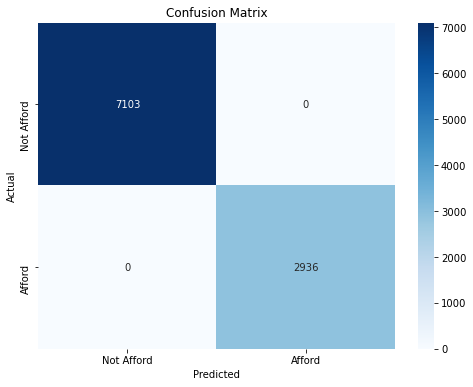

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Afford', 'Afford'], yticklabels=['Not Afford', 'Afford'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


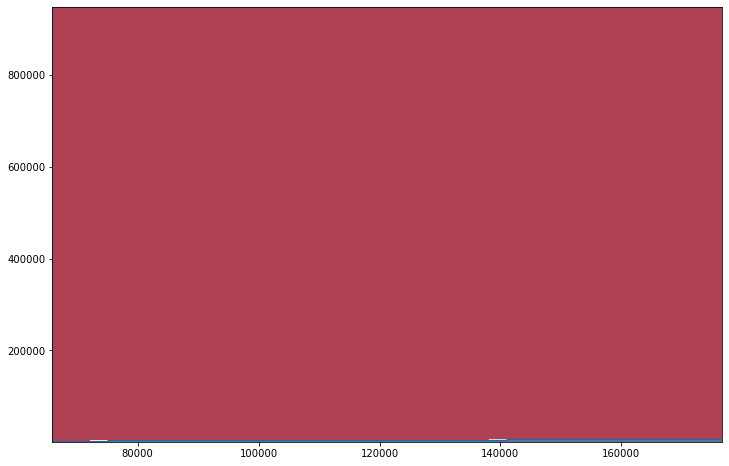

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Select two features for visualization (e.g., Average Income and Monthly Mortgage)
X = df2[['Average Income', 'Monthly_Mortgage']]
y = df2['can_afford']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Create a grid of values for plotting decision boundary
x_min, x_max = X['Average Income'].min() - 1000, X['Average Income'].max() + 1000
y_min, y_max = X['Monthly_Mortgage'].min() - 100, X['Monthly_Mortgage'].max() + 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, 100),
                     np.arange(y_min, y_max, 100))

# Predict probabilities for the grid
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdBu')


<bound method Axes.set_ylabel of <AxesSubplot:xlabel='Standardized Average Income'>>

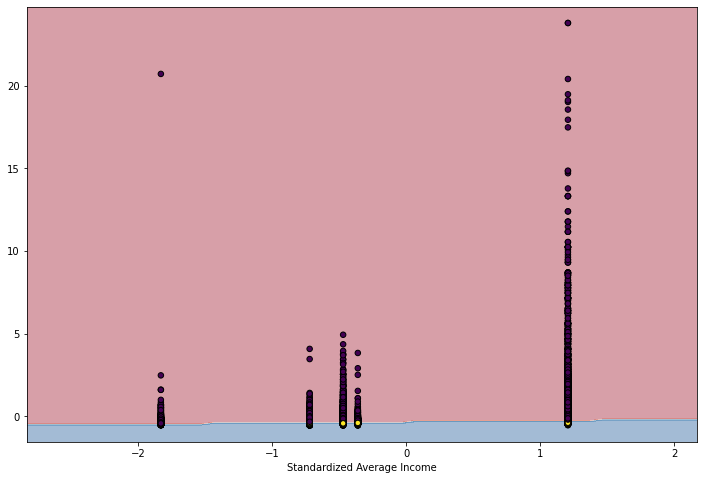

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select two features for visualization
features_to_use = ['Average Income', 'Monthly_Mortgage']
X = df2[features_to_use]
y = df2['can_afford']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create a grid for plotting
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx_n, yy_n = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on the grid
Z = model.predict(np.c_[xx_n.ravel(), yy_n.ravel()])
Z = Z.reshape(xx_n.shape)

# Plotting
plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.contourf(xx_n, yy_n, Z, alpha=0.4, cmap='RdBu')
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=30, edgecolor='k')
ax.set_xlabel('Standardized Average Income')
ax.set_ylabel
